In [1]:
import os
import pandas as pd

def check_answers(filename):
	df = pd.read_csv(f"data/test/{filename}.csv")
	df = df.dropna(subset=["question"])
	total_lines = len(df)
	with open(f"results/{filename}_answers.txt", "r") as file:
		lines = file.readlines()
		total_answers = len(lines)
	return total_lines == total_answers

discrepencancies = []
for filename in os.listdir("data/test"):
	if filename.endswith(".csv"):
		try:
			if not check_answers(filename[:-4]):
				discrepencancies.append(filename)
		except:
			continue

if len(discrepencancies) == 0:
	print("All tests have the correct number of answers")
else:
	print("The following tests have a different number of answers than questions:")
	for filename in discrepencancies:
		print(f"  {filename}")

All tests have the correct number of answers


In [13]:
def compare_answers(filename):
	df = pd.read_csv(f"data/test/{filename}.csv", names=['question', 'A', 'B', 'C', 'D', 'answer'])
	df = df.dropna(subset=["question"])
	answers = df['answer'].tolist()
	answers = [str(answer).strip() for answer in answers]
	with open(f"results/{filename}_answers.txt", "r") as file:
		lines = file.readlines()
		lines = [line.split(".")[1].strip() for line in lines]
	return [answers[i] == lines[i] for i in range(len(answers))]

comparision = {}

for filename in os.listdir("data/test"):
	if filename.endswith(".csv"):
		try:
			comparision[filename[:-4]] = compare_answers(filename[:-4])
		except:
			continue

In [16]:
acuracies = {}

# calculate accuracy
for test in comparision:
	accuracy = sum(comparision[test]) / len(comparision[test])
	acuracies[test] = accuracy

# overall accuracy
total_correct = 0
total_questions = 0
for test in comparision:
	total_correct += sum(comparision[test])
	total_questions += len(comparision[test])

overall_accuracy = total_correct / total_questions
print(f"Overall accuracy: {overall_accuracy}")

Overall accuracy: 0.6402934054977923


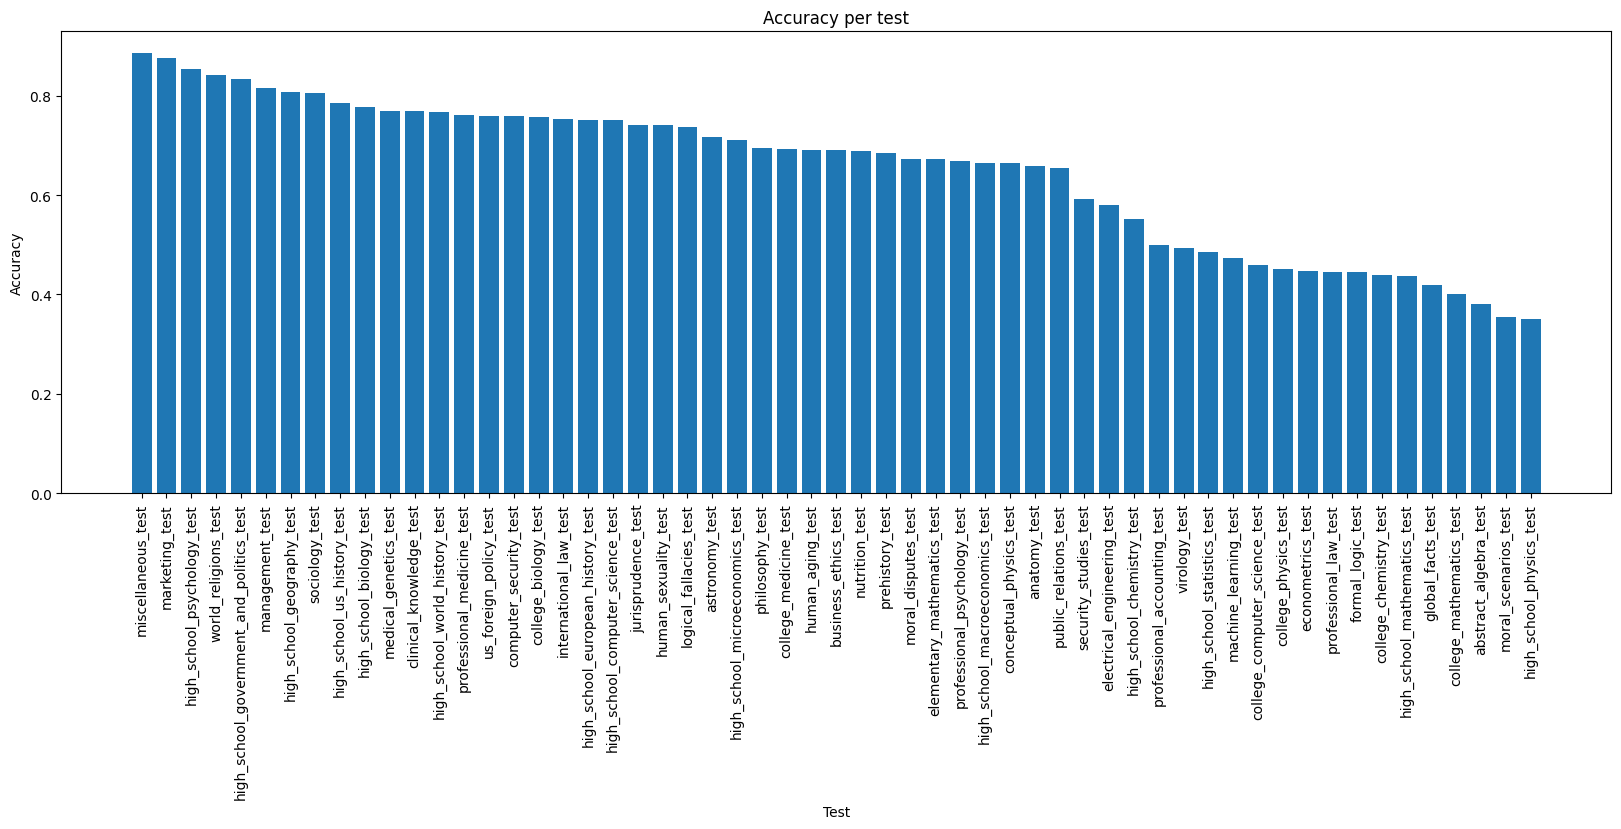

In [19]:
sorted_acuracies = sorted(acuracies.items(), key=lambda x: x[1], reverse=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar([test for test, accuracy in sorted_acuracies], [accuracy for test, accuracy in sorted_acuracies])
plt.ylabel('Accuracy')
plt.xlabel('Test')
plt.title('Accuracy per test')
plt.xticks(rotation=90)
plt.show()